<a href="https://colab.research.google.com/github/RomanaNourin/Skin-Cancer/blob/main/RN__GAN_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data preprocessing

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
label_mapping = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'mel': 6,
    'vasc': 5
}

In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images'

In [ ]:
import os

def list_subfolders(folder_path):
  """Lists the subfolders within a given folder path."""
  subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
  return subfolders

# List the first 6 subfolders in the image_folder
subfolders = list_subfolders(image_folder)
print("First 6 subfolders:")
for i in range(min(6, len(subfolders))):
  print(subfolders[i])

First 6 subfolders:
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bkl
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/df
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/mel
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/vasc
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bcc
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/akiec


First 6 subfolders:
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bkl
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/df
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/mel
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/vasc
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bcc
/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/akiec


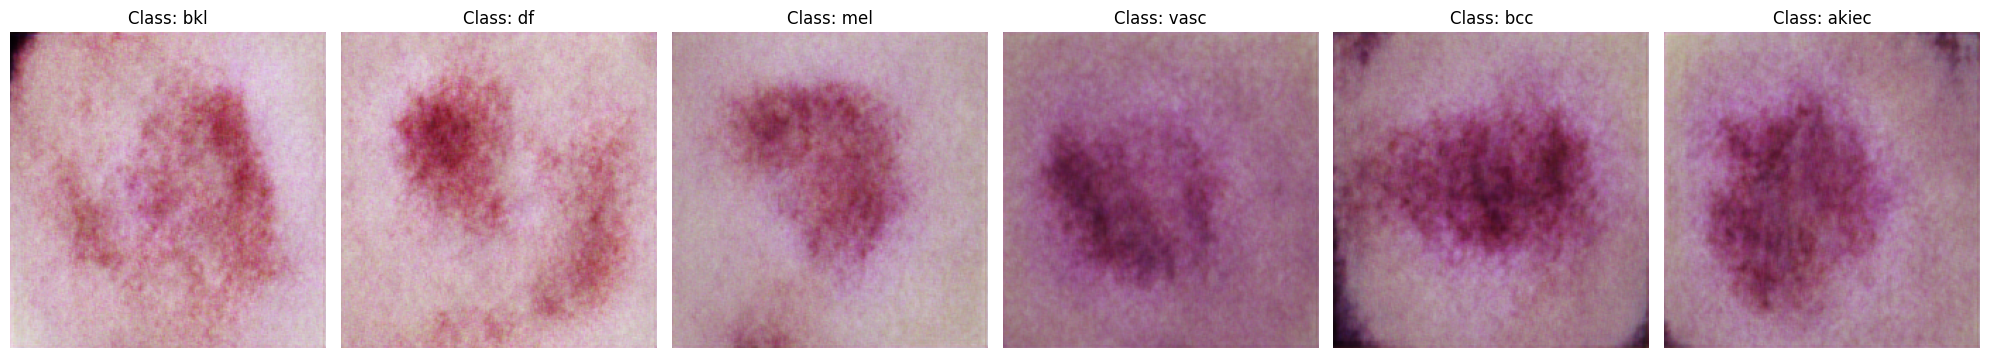

In [ ]:
def list_subfolders(folder_path):
  """Lists the subfolders within a given folder path."""
  subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
  return subfolders

# List the first 6 subfolders in the image_folder
subfolders = list_subfolders(image_folder)
print("First 6 subfolders:")
for i in range(min(6, len(subfolders))):
  print(subfolders[i])

# Function to display images from different subfolders
def display_images_from_subfolders(image_folder, num_images_per_folder=5):
  subfolders = list_subfolders(image_folder)
  plt.figure(figsize=(20, 5))  # Adjust figure size as needed

  for i, subfolder in enumerate(subfolders[:num_images_per_folder]):
      class_name = os.path.basename(subfolder)
      image_files = [f for f in os.listdir(subfolder) if f.endswith(('.jpg', '.png'))]
      if image_files:
          image_path = os.path.join(subfolder, image_files[0])  # Select the first image in the subfolder
          img = Image.open(image_path)

          plt.subplot(1, num_images_per_folder, i + 1)
          plt.imshow(img)
          plt.title(f"Class: {class_name}")
          plt.axis('off')

  plt.tight_layout()
  plt.show()

display_images_from_subfolders(image_folder, num_images_per_folder=6)

In [ ]:
output_csv = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv' #ETa akhono amra generate korini ezonno not found dekhabe

In [ ]:
import pandas as pd
try:
  df = pd.read_csv(output_csv)
  print(df)
except FileNotFoundError:
  print(f"The file '{output_csv}' was not found.")


The file '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv' was not found.


In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images'
output_csv = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv'

In [ ]:
import os

image_folder = '/content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images'

for subdir, dirs, files in os.walk(image_folder):
    if subdir != image_folder:  # Skip the main folder itself
      image_count = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
      print(f"Folder: {subdir}, Number of images: {image_count}")

Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bkl, Number of images: 5606
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/df, Number of images: 6590
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/mel, Number of images: 5592
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/vasc, Number of images: 6563
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/bcc, Number of images: 6191
Folder: /content/drive/MyDrive/Skin HAM10000/Latest/Synthetic_Images/akiec, Number of images: 6378


In [ ]:
def image_to_pixels(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = np.array(img)
    if img.shape == (28, 28, 3):
        img_flatten = img.flatten()
        return img_flatten
    else:
        return None

In [ ]:
data = []
for label_name, label_num in label_mapping.items():
    folder_path = os.path.join(image_folder, label_name)

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        pixels = image_to_pixels(file_path)
        if pixels is not None:
            data.append(list(pixels) + [label_num])

In [ ]:
pixel_columns = [f'pixel{str(i).zfill(4)}' for i in range(28*28*3)]
df = pd.DataFrame(data, columns=pixel_columns + ['label'])

In [ ]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,196,178,168,190,171,160,187,168,161,185,...,168,134,145,166,136,142,166,137,143,0
1,147,111,121,150,111,124,151,116,128,151,...,140,99,120,141,104,123,139,106,123,0
2,39,15,33,72,32,57,83,43,73,104,...,137,105,126,110,76,103,75,44,68,0
3,190,169,163,186,165,160,188,166,166,187,...,173,141,150,175,149,152,175,153,154,0
4,185,164,157,182,162,153,184,162,158,182,...,158,118,134,159,125,135,156,122,133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36915,151,112,121,154,116,125,154,117,128,153,...,125,87,115,114,79,109,97,62,89,5
36916,162,132,135,167,138,143,168,136,147,164,...,79,38,65,61,27,51,41,16,31,5
36917,168,138,144,172,147,150,173,143,153,170,...,154,112,132,147,107,128,138,98,118,5
36918,138,105,119,148,112,127,151,117,131,151,...,71,36,64,52,25,51,35,14,27,5


In [ ]:
df.to_csv(output_csv, index=False)

In [ ]:
df["label"].value_counts()

,count
label,
3,6590
5,6563
0,6378
1,6191
2,5606
6,5592


In [ ]:
difference = 134

if difference > 0:
    # Randomly sample 'difference' rows where label is 6
    drop_indices = df[df['label'] == 6].sample(n=difference, random_state=42).index

    # Drop these indices from the DataFrame
    df = df.drop(drop_indices)

# Verify the new value counts
print(df['label'].value_counts())

label
3    6590
5    6563
0    6378
1    6191
2    5606
6    5458
Name: count, dtype: int64


In [ ]:
df.to_csv(output_csv, index=False)

# Hybrid

**Using the Previous Model**

In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax, Adagrad, RMSprop, Adadelta, Nadam, Ftrl, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import register_keras_serializable


In [ ]:
real_data_path = '/content/drive/MyDrive/Skin HAM10000/Latest/hmnist_28_28_RGB.csv'  # Update this path


In [ ]:
try:
    df = pd.read_csv(real_data_path)

    # Assuming the 'label' column exists in your CSV
    label_counts = df['label'].value_counts()
    print(label_counts)

except FileNotFoundError:
    print(f"Error: The file '{real_data_path}' was not found.")
except KeyError:
    print(f"Error: The 'label' column was not found in '{real_data_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64


In [ ]:
# Define paths to your datasets
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/Latest/synthetic_images_pixel_values_n.csv'  # Update this path

# Load datasets
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]




In [ ]:
# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
y = to_categorical(Label_encoded, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=42, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

Training set shape: (35201, 28, 28, 3), Training labels shape: (35201, 7)
Testing set shape: (11734, 28, 28, 3), Testing labels shape: (11734, 7)


In [ ]:
import numpy as np

# Assuming y_train and y_test are one-hot encoded
def count_images_per_class(y_data):
    class_counts = np.sum(y_data, axis=0)
    return class_counts

# Count images per class for training set
train_class_counts = count_images_per_class(y_train)
print("Number of images per class in training set:")
for class_index, count in enumerate(train_class_counts):
    print(f"Class {class_index}: {int(count)}")

# Count images per class for testing set
test_class_counts = count_images_per_class(y_test)
print("\nNumber of images per class in testing set:")
for class_index, count in enumerate(test_class_counts):
    print(f"Class {class_index}: {int(count)}")

Number of images per class in training set:
Class 0: 5029
Class 1: 5029
Class 2: 5029
Class 3: 5028
Class 4: 5029
Class 5: 5029
Class 6: 5028

Number of images per class in testing set:
Class 0: 1676
Class 1: 1676
Class 2: 1676
Class 3: 1677
Class 4: 1676
Class 5: 1676
Class 6: 1677


In [ ]:
pip install tensorflow keras numpy pandas matplotlib scikit-learn joblib


In [ ]:
@register_keras_serializable()
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        # ----- Residual Connection -----
        output = Add()([spatial_attention, inputs])

        return output

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config


In [ ]:
# Define the input shape and number of classes
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Input Layer
inputs = Input(shape=input_shape, name='input_layer')

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_1')(inputs)
x = MaxPooling2D(name='max_pooling2d_1')(x)
x = BatchNormalization(name='batch_normalization_1')(x)

# Convolutional Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_2')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_3')(x)
x = MaxPooling2D(name='max_pooling2d_2')(x)
x = BatchNormalization(name='batch_normalization_2')(x)

# Convolutional Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_4')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_5')(x)
x = MaxPooling2D(name='max_pooling2d_3')(x)
x = BatchNormalization(name='batch_normalization_3')(x)

# Convolutional Block 4
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_6')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_7')(x)
x = MaxPooling2D(name='max_pooling2d_4')(x)

# Integrate CBAM after the last convolutional block
x = CBAM(name='cbam_1')(x)

# Flatten and Dense Layers
x = Flatten(name='flatten_1')(x)
x = Dropout(rate=0.2, name='dropout_1')(x)
x = Dense(units=256, activation='relu',
          kernel_initializer='he_normal', name='dense_1')(x)
x = BatchNormalization(name='batch_normalization_4')(x)

x = Dense(units=128, activation='relu',
          kernel_initializer='he_normal', name='dense_2')(x)
x = BatchNormalization(name='batch_normalization_5')(x)

x = Dense(units=64, activation='relu',
          kernel_initializer='he_normal', name='dense_3')(x)
x = BatchNormalization(name='batch_normalization_6')(x)

x = Dense(units=32, activation='relu',
          kernel_initializer='he_normal',
          kernel_regularizer=L1L2(), name='dense_4')(x)
x = BatchNormalization(name='batch_normalization_7')(x)

# Output Layer
outputs = Dense(units=num_classes, activation='softmax',
               kernel_initializer='glorot_uniform', name='classifier')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs, name='CBAM_Functional_Model')

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "CBAM_Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam_1 (CBAM)                        │ (None, 1, 1, 256)           │           8,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,0

 Total params: 1,283,641 (4.90 MB)

 Trainable params: 1,282,233 (4.89 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# Define callbacks for model checkpointing, learning rate reduction, and TensorBoard
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=0.0001,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks (EarlyStopping removed)
callbacks = [checkpoint, reduce_lr, tensorboard]

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=100,  # Adjust the number of epochs as needed
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
1099/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5323 - loss: 1.1923
Epoch 1: val_accuracy improved from -inf to 0.73828, saving model to /content/drive/MyDrive/Skin HAM10000/Latest/output/final_n.keras
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.5325 - loss: 1.1918 - val_accuracy: 0.7383 - val_loss: 0.6822 - learning_rate: 0.0010
Epoch 2/100
1099/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7245 - loss: 0.7274
Epoch 2: val_accuracy improved from 0.73828 to 0.85981, saving model to /content/drive/MyDrive/Skin HAM10000/Latest/output/final_n.keras
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.7246 - loss: 0.7272 - val_accuracy: 0.8598 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 3/100
1097/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8060 - loss: 0.5416
Epoch 3: val_accuracy did not improve from 0.85981
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.8061 - loss: 0.5414 - val_accuracy: 0.8405 - val_loss: 0.42

In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n_cbam.keras')
print("Model saved successfully.")


Model saved successfully.


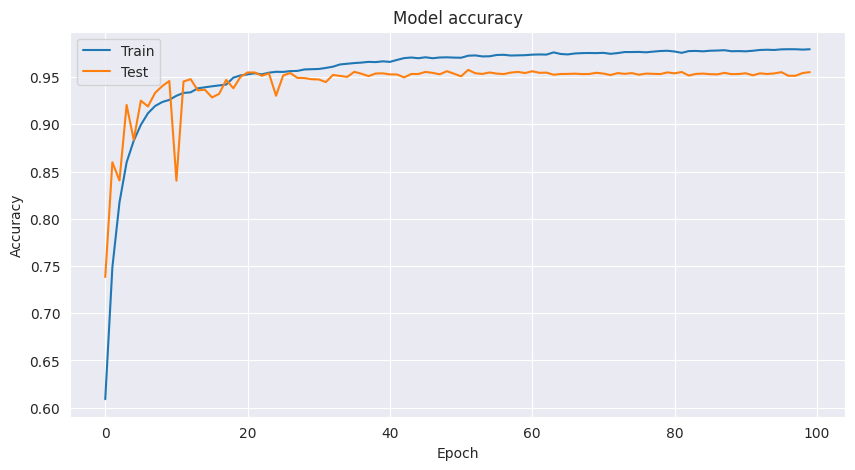

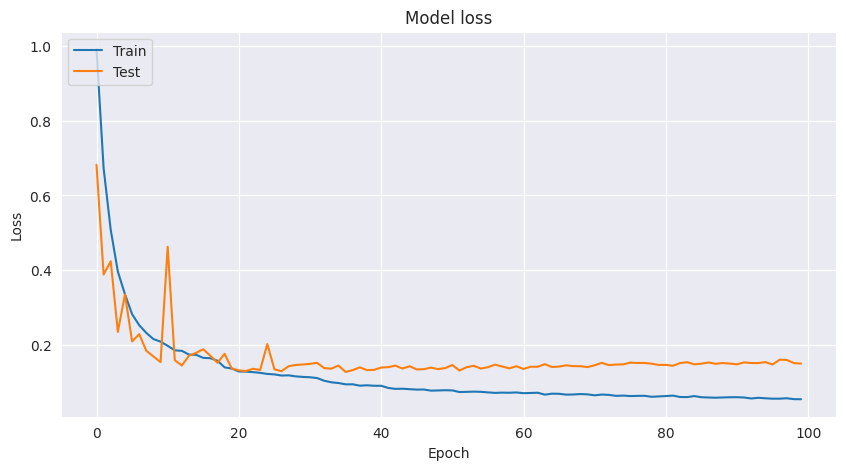

In [ ]:
# prompt: write to plot accuracy and loss for model

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the training and testing sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training accuracy: {train_accuracy:.4f}, Training loss: {train_loss:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}, Testing loss: {test_loss:.4f}")

Training accuracy: 0.9840, Training loss: 0.0428
Testing accuracy: 0.9552, Testing loss: 0.1509


In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    jaccard_score, confusion_matrix
)

# Load the saved model
model = load_model('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n_cbam.keras')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
jaccard = jaccard_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Jaccard Score: {jaccard}")
print("Confusion Matrix:")
conf_matrix


367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Loss: 0.15094731748104095
Test Accuracy: 0.9551730155944824
Precision: 0.9551804706401005
Recall: 0.9551730015340038
F1-Score: 0.9551291789248706
Cohen's Kappa: 0.9477018247408623
Matthews Correlation Coefficient: 0.9477180140442701
Jaccard Score: 0.9159453920547797
Confusion Matrix:


array([[1639,   18,    8,    1,    6,    1,    3],
       [  21, 1632,    9,    1,    6,    1,    6],
       [  15,   10, 1557,    3,   53,    0,   38],
       [   3,    9,    3, 1652,    5,    1,    4],
       [   7,   13,   50,    3, 1500,    4,   99],
       [   0,    3,    0,    0,    3, 1667,    3],
       [   4,   10,   37,    2,   61,    2, 1561]])

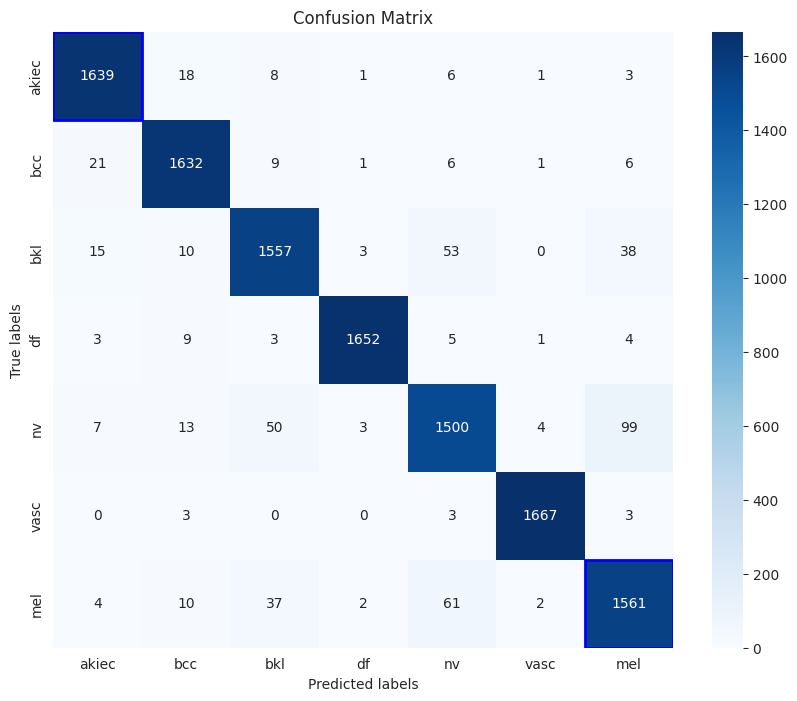

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a figure and axes
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')  # Use 'Blues' colormap

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set custom tick labels (class names)
ax.xaxis.set_ticklabels([classes[i][0] for i in range(len(classes))])
ax.yaxis.set_ticklabels([classes[i][0] for i in range(len(classes))])

# Highlight specific classes
highlight_classes = ['mel', 'akiec']
for class_name in highlight_classes:
    # Find the index of the class name in the keys of the classes dictionary
    # Simplified logic to find the class index
    class_index = list(classes.keys())[list(classes.values()).index((class_name, classes[list(classes.keys())[list(v[0] for v in classes.values()).index(class_name)]][1]))]
    # Add a rectangle patch to highlight the cell
    ax.add_patch(plt.Rectangle((class_index, class_index), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

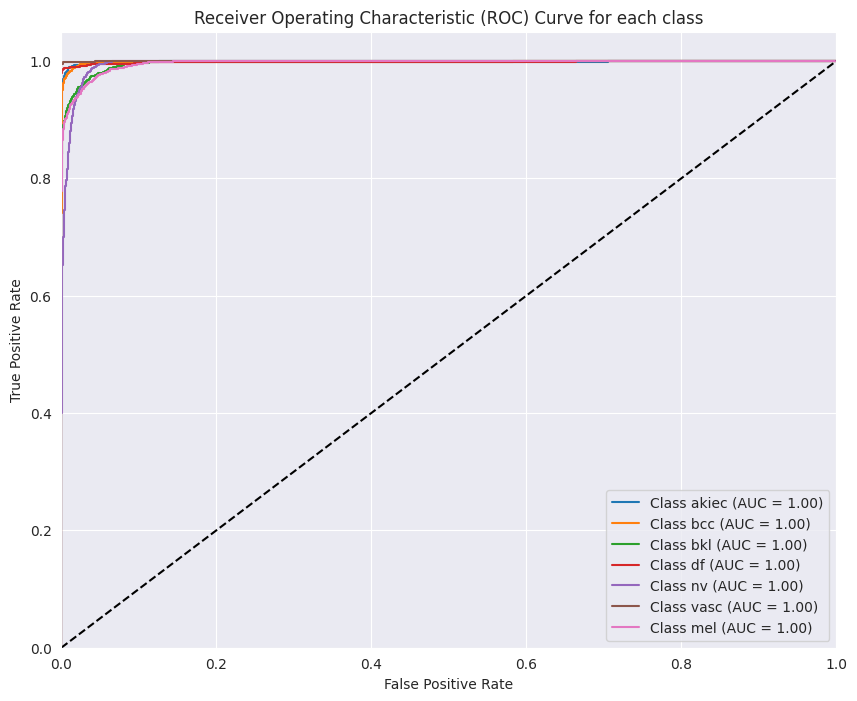

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)  # Use the length of your classes dictionary
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i][0]} (AUC = {roc_auc[i]:.2f})') # Use classes dictionary for labels

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Load the best saved model with custom_objects
loaded_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)
print("Model loaded successfully.")

# Evaluate on training data
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")

print('-' * 30)

# Evaluate on testing data
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# Initialize the loaded model by passing real data
real_data_batch = X_train[:10]  # Using the first 10 samples from training data
_ = loaded_model.predict(real_data_batch, verbose=1)
print("Model initialized with a real input batch.")


Model loaded successfully.
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9779 - loss: 0.0597
Train Loss: 0.0591
Train Accuracy: 97.82%
------------------------------
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9587 - loss: 0.1275
Test Loss: 0.1323
Test Accuracy: 95.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model initialized with a real input batch.


In [ ]:
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n.keras'  # Update this path as needed


In [ ]:
# Load the best saved model with custom_objects
loaded_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)
print("Model loaded successfully.")
# Verify layer names to ensure correct selection for feature extraction
for layer in loaded_model.layers:
    print(layer.name)

# Create the feature extraction model up to 'flatten_1' layer
feature_extraction_layer = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('flatten_1').output)
print("Feature extraction model created successfully.")


Model loaded successfully.
input_layer
conv2d_1
max_pooling2d_1
batch_normalization_1
conv2d_2
conv2d_3
max_pooling2d_2
batch_normalization_2
conv2d_4
conv2d_5
max_pooling2d_3
batch_normalization_3
conv2d_6
conv2d_7
max_pooling2d_4
cbam_1
flatten_1
dropout_1
dense_1
batch_normalization_4
dense_2
batch_normalization_5
dense_3
batch_normalization_6
dense_4
batch_normalization_7
classifier
Feature extraction model created successfully.


In [ ]:
print("Extracting features from training data...")
X_train_features = feature_extraction_layer.predict(X_train, verbose=1)
print("Extracting features from testing data...")
X_test_features = feature_extraction_layer.predict(X_test, verbose=1)

# Print feature shapes to verify
print(f"Shape of extracted training features: {X_train_features.shape}")
print(f"Shape of extracted testing features: {X_test_features.shape}")


Extracting features from training data...
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 55s 49ms/step
Extracting features from testing data...
367/367 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step
Shape of extracted training features: (35201, 256)
Shape of extracted testing features: (11734, 256)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training features
print("Training Random Forest classifier...")
rf_classifier.fit(X_train_features, y_train_int)
print("Random Forest classifier trained successfully.")

# Make predictions on the test set
print("Making predictions with Random Forest classifier...")
y_pred_rf = rf_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_int, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf*100:.2f}%")

# Generate classification report
report_rf = classification_report(
    y_test_int, y_pred_rf,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("Random Forest Classification Report:\n", report_rf)


Training Random Forest classifier...
Random Forest classifier trained successfully.
Making predictions with Random Forest classifier...
Random Forest Classifier Accuracy: 95.90%
Random Forest Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.98      0.97      0.98      1676
                            Basal cell carcinoma       0.97      0.97      0.97      1676
                   Benign keratosis-like lesions       0.94      0.93      0.94      1676
                                  Dermatofibroma       1.00      0.98      0.99      1677
                                Melanocytic nevi       0.89      0.94      0.91      1676
              Pyogenic granulomas and hemorrhage       1.00      0.99      1.00      1676
                                        Melanoma       0.95      0.92      0.93      1677

                                        accuracy              

Confusion matrix, without normalization
[[1632   21   12    0    7    0    4]
 [  16 1628   15    0   10    3    4]
 [   9    4 1562    1   73    0   27]
 [   3   10    5 1645   10    1    3]
 [   1    7   39    0 1581    3   45]
 [   0    3    0    0    3 1667    3]
 [   2    8   31    0   98    0 1538]]


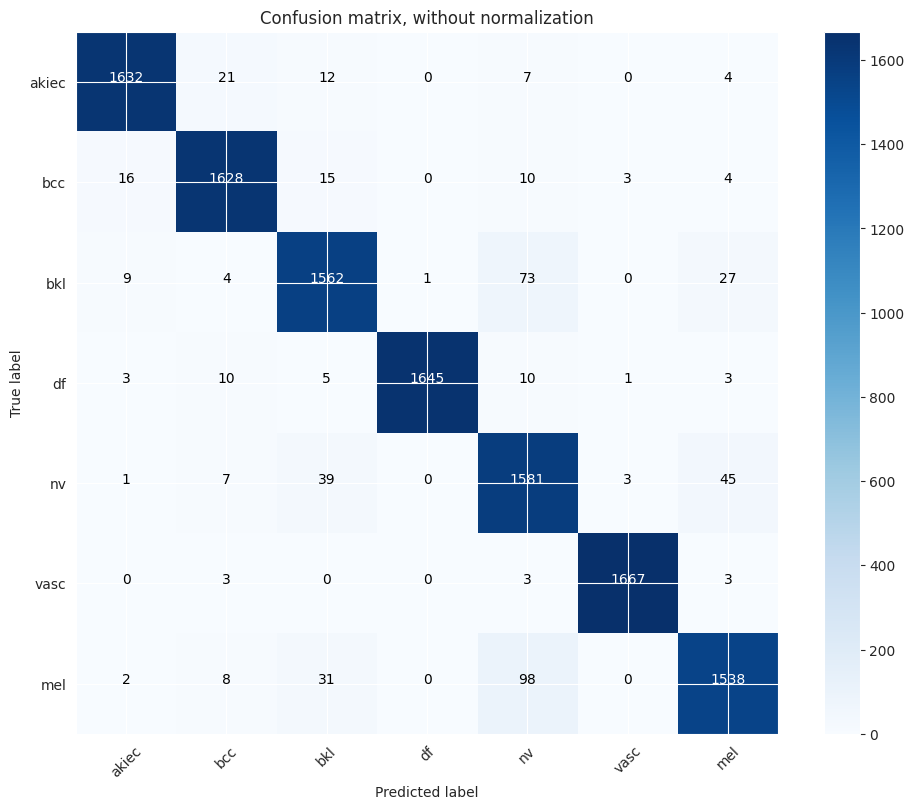

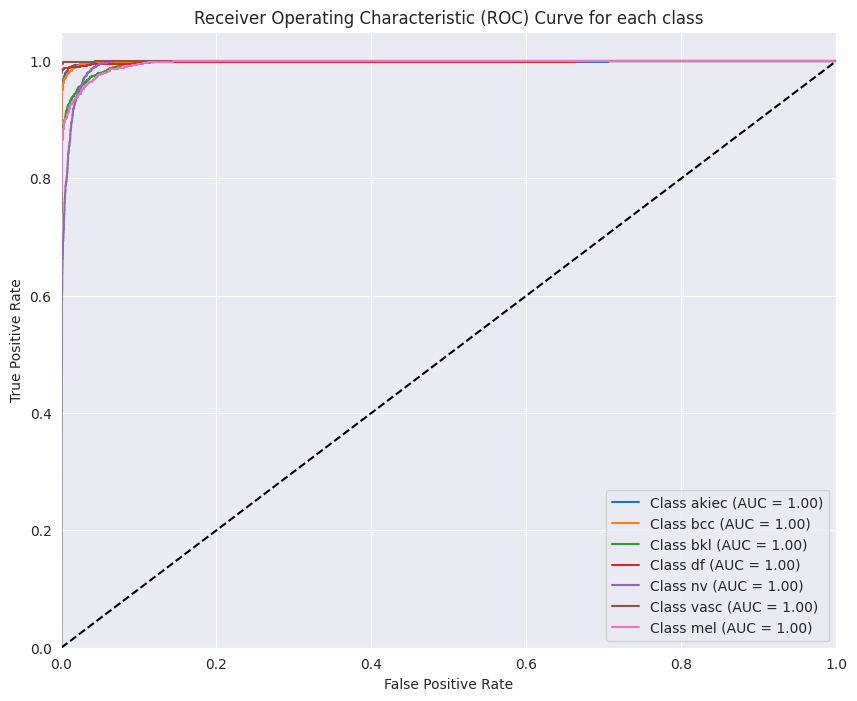

Training Loss: 0.0428
Testing Loss: 0.1509
Kappa: 0.9485
MCC: 0.9485
Jaccard: 0.9173


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef, jaccard_score, precision_score, recall_score
import itertools
import numpy as np

# Assuming y_true_classes, y_pred_classes, and classes are defined from previous code
# Example:
# y_true_classes = np.array([0, 1, 0, 1, 0])
# y_pred_classes = np.array([0, 0, 1, 1, 0])
# classes = {0: ('akiec', 'Actinic keratoses'), 1: ('nv', 'Melanocytic nevi')}


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Assuming cnf_matrix and class_names are defined from previous code
cnf_matrix = confusion_matrix(y_true_classes, y_pred_rf)
class_names = [classes[i][0] for i in sorted(classes)] # Use original class names

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()


# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names)

# Assuming y_test and y_pred are probabilities and correctly shaped
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i]) # Replace y_pred with y_pred_rf probabilities if needed.
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


# Print Metrics
print(f"Training Loss: {train_loss:.4f}") # Assuming train_loss is defined
print(f"Testing Loss: {test_loss:.4f}") # Assuming test_loss is defined
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Jaccard: {jaccard:.4f}")

In [ ]:
import joblib

rf_model_path = '/content/drive/MyDrive/Skin HAM10000/Latest/output/rf_final.joblib'
joblib.dump(rf_classifier, rf_model_path)
print(f"Random Forest model saved successfully at {rf_model_path}")


Random Forest model saved successfully at /content/drive/MyDrive/Skin HAM10000/Latest/output/rf_final.joblib


Random Forest Predicted Class: Dermatofibroma
True Class: Dermatofibroma


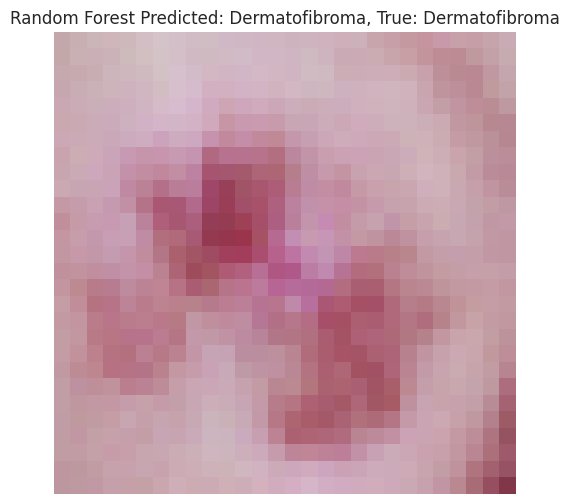

In [ ]:
import matplotlib.pyplot as plt

# Choose an index to visualize
index = 0  # Change as needed

# Extract the feature for the selected test image
test_image_feature = X_test_features[index].reshape(1, -1)
test_label_int = y_test_int[index]

# Make a prediction using Random Forest
predicted_class_rf = rf_classifier.predict(test_image_feature)[0]

# Print the predicted and true class
print(f"Random Forest Predicted Class: {classes[predicted_class_rf][1]}")
print(f"True Class: {classes[test_label_int][1]}")

# Display the image with predicted and true labels
plt.figure(figsize=(6,6))
plt.imshow(X_test[index])
plt.title(f"Random Forest Predicted: {classes[predicted_class_rf][1]}, True: {classes[test_label_int][1]}")
plt.axis('off')
plt.show()


# **Different machine learning models**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

In [ ]:
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_classifier = SVC(kernel='linear', C=1, probability=True, random_state=42) # You can adjust the kernel and other parameters

# Train the classifier on the training features
print("Training SVC classifier...")
svc_classifier.fit(X_train_features, y_train_int)
print("SVC classifier trained successfully.")

# Make predictions on the test set
print("Making predictions with SVC classifier...")
y_pred_svc = svc_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test_int, y_pred_svc)
print(f"SVC Classifier Accuracy: {accuracy_svc*100:.2f}%")

# Generate classification report
report_svc = classification_report(
    y_test_int, y_pred_svc,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("SVC Classification Report:\n", report_svc)



Training SVC classifier...
SVC classifier trained successfully.
Making predictions with SVC classifier...
SVC Classifier Accuracy: 95.14%
SVC Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.96      0.97      0.97      1676
                            Basal cell carcinoma       0.96      0.97      0.96      1676
                   Benign keratosis-like lesions       0.92      0.92      0.92      1676
                                  Dermatofibroma       0.99      0.98      0.99      1677
                                Melanocytic nevi       0.90      0.91      0.90      1676
              Pyogenic granulomas and hemorrhage       1.00      1.00      1.00      1676
                                        Melanoma       0.93      0.91      0.92      1677

                                        accuracy                           0.95     11734
                      

Confusion matrix, without normalization
[[1633   18   13    2    5    0    5]
 [  24 1623   13    4    3    2    7]
 [  19   18 1541    3   68    0   27]
 [   3    6    4 1650   10    1    3]
 [   3   14   61    2 1526    4   66]
 [   0    4    0    0    2 1668    2]
 [  12    7   42    2   91    0 1523]]


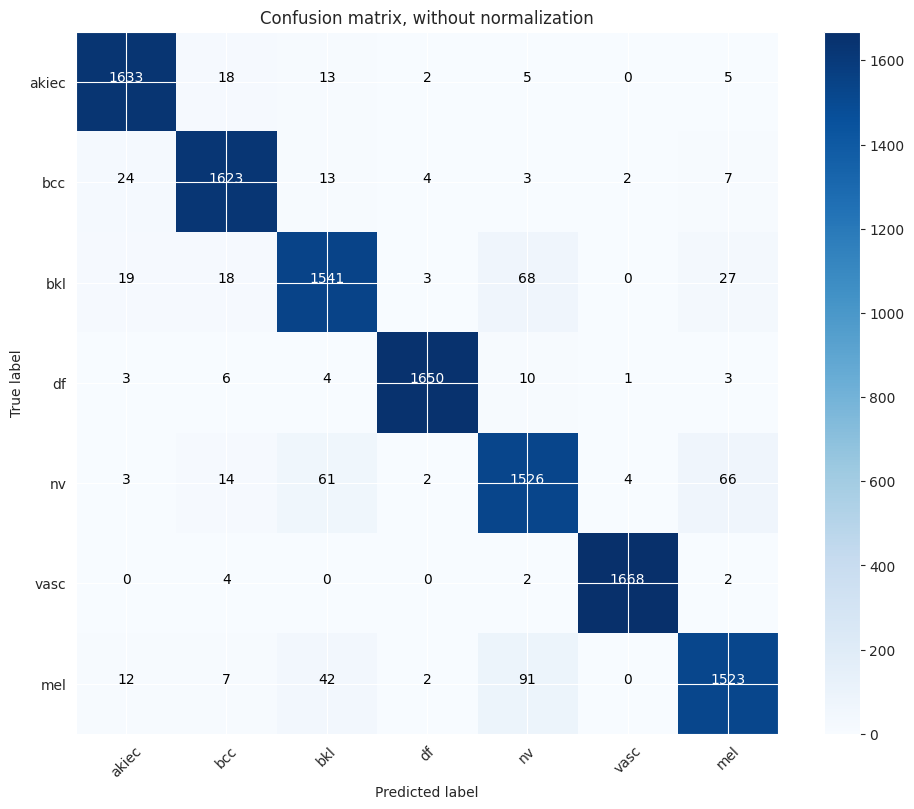

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Assuming y_true_classes and y_pred_svc are defined
cnf_matrix = confusion_matrix(y_true_classes, y_pred_svc)
class_names = [classes[i][0] for i in sorted(classes)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, jaccard_score


kappa = cohen_kappa_score(y_true_classes, y_pred_svc)
mcc = matthews_corrcoef(y_true_classes, y_pred_svc)
jaccard = jaccard_score(y_true_classes, y_pred_svc, average='weighted')  # Use 'weighted' for multi-class

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")

# Assuming test_loss is defined from previous code (e.g., from model.evaluate)
print(f"Testing Loss: {test_loss}")

Kappa: 0.9433271108545159
MCC: 0.9433410911381893
Jaccard: 0.9093520252776122
Testing Loss: 0.15094731748104095


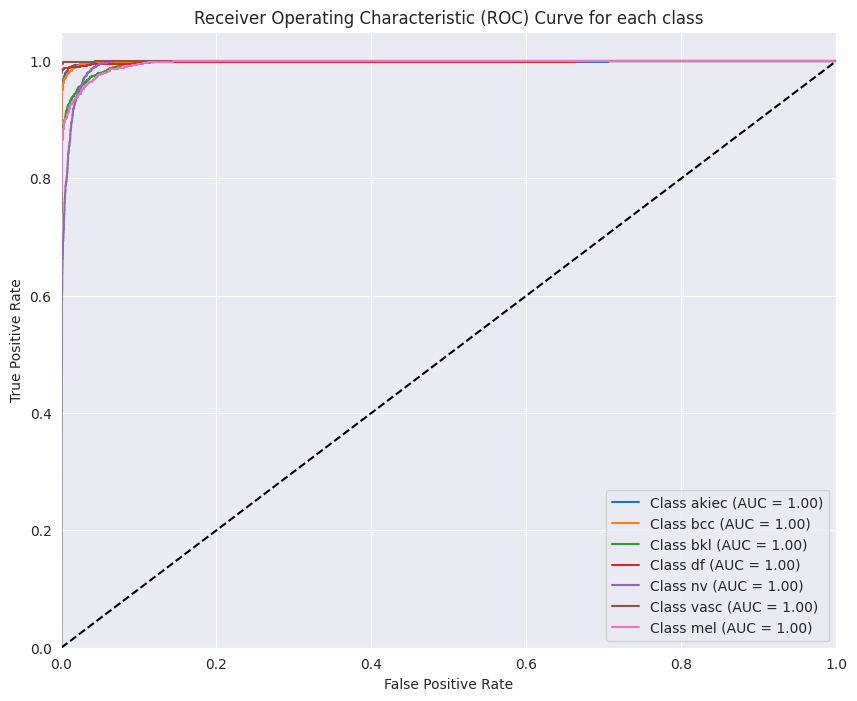

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_svc are probabilities and correctly shaped
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i]) # Use y_pred from the model, not y_pred_svc which are classes, not probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model  # Import the load_model function
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    jaccard_score, confusion_matrix
)

# Load the saved model
model = load_model('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n_cbam.keras')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
mcc = matthews_corrcoef(y_true_classes, y_pred_classes)
jaccard = jaccard_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Jaccard Score: {jaccard}")
print("Confusion Matrix:")
conf_matrix


367/367 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step
Test Loss: 0.15094728767871857
Test Accuracy: 0.9551730155944824
Precision: 0.9551804706401005
Recall: 0.9551730015340038
F1-Score: 0.9551291789248706
Cohen's Kappa: 0.9477018247408623
Matthews Correlation Coefficient: 0.9477180140442701
Jaccard Score: 0.9159453920547797
Confusion Matrix:


array([[1639,   18,    8,    1,    6,    1,    3],
       [  21, 1632,    9,    1,    6,    1,    6],
       [  15,   10, 1557,    3,   53,    0,   38],
       [   3,    9,    3, 1652,    5,    1,    4],
       [   7,   13,   50,    3, 1500,    4,   99],
       [   0,    3,    0,    0,    3, 1667,    3],
       [   4,   10,   37,    2,   61,    2, 1561]])

In [ ]:
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)


Training Logistic Regression classifier...
Logistic Regression classifier trained successfully.
Making predictions with Logistic Regression classifier...
Logistic Regression Classifier Accuracy: 95.31%
Logistic Regression Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.97      0.97      0.97      1676
                            Basal cell carcinoma       0.96      0.96      0.96      1676
                   Benign keratosis-like lesions       0.93      0.93      0.93      1676
                                  Dermatofibroma       0.99      0.98      0.99      1677
                                Melanocytic nevi       0.89      0.92      0.91      1676
              Pyogenic granulomas and hemorrhage       0.99      1.00      0.99      1676
                                        Melanoma       0.93      0.91      0.92      1677

                                

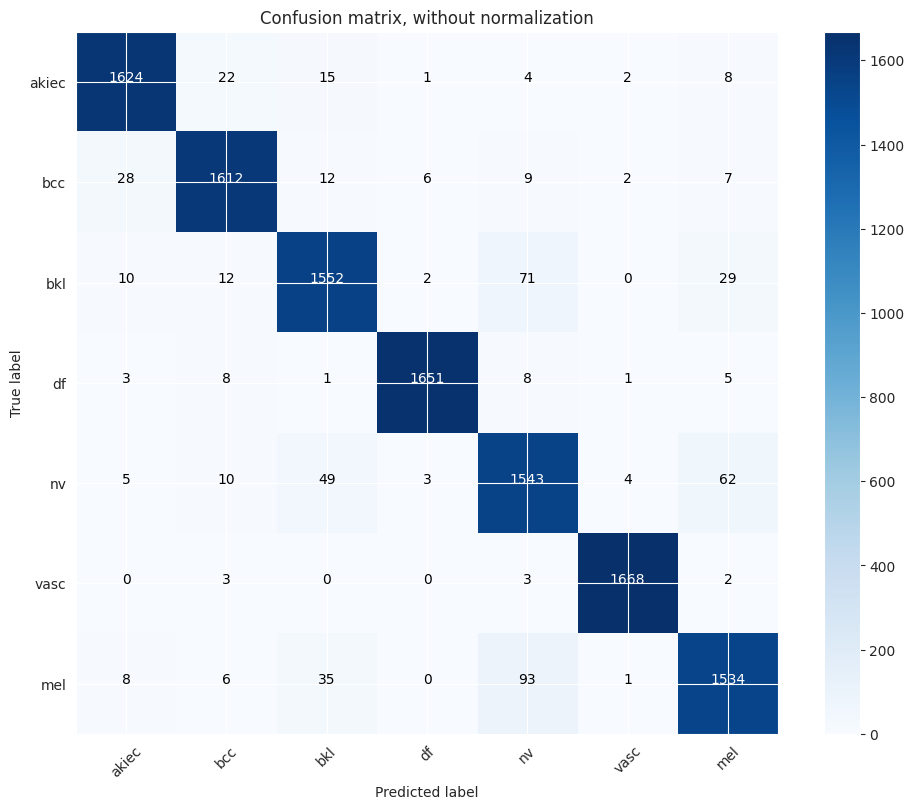

Kappa: 0.9453156267936464
MCC: 0.9453327766160763
Jaccard: 0.91233974730434


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef, jaccard_score
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Assuming X_train_features, y_train_int, X_test_features, y_test_int, and classes are defined from previous code

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter

# Train the classifier on the training features
print("Training Logistic Regression classifier...")
lr_classifier.fit(X_train_features, y_train_int)
print("Logistic Regression classifier trained successfully.")


# Make predictions on the test set
print("Making predictions with Logistic Regression classifier...")
y_pred_lr = lr_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_int, y_pred_lr)
print(f"Logistic Regression Classifier Accuracy: {accuracy_lr*100:.2f}%")

# Generate classification report
report_lr = classification_report(
    y_test_int, y_pred_lr,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("Logistic Regression Classification Report:\n", report_lr)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred_lr)
class_names = [classes[i][0] for i in sorted(classes)]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

kappa = cohen_kappa_score(y_test_int, y_pred_lr)
mcc = matthews_corrcoef(y_test_int, y_pred_lr)
jaccard = jaccard_score(y_test_int, y_pred_lr, average='weighted')

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")

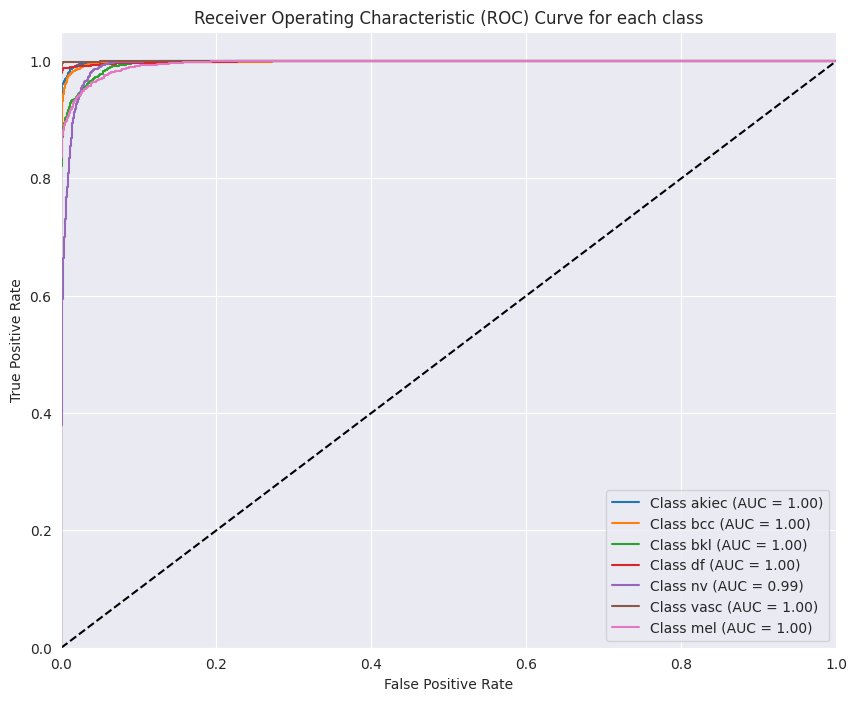

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are probabilities and correctly shaped
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names) # Assuming class_names is defined

# Use predict_proba for probabilities instead of predict
y_pred_proba_lr = lr_classifier.predict_proba(X_test_features)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_features, y_train_int, X_test_features, y_test_int are defined from previous code

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
print("Training KNN classifier...")
knn_classifier.fit(X_train_features, y_train_int)
print("KNN classifier trained successfully.")

# Make predictions
print("Making predictions with KNN classifier...")
y_pred_knn = knn_classifier.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test_int, y_pred_knn)
print(f"KNN Accuracy: {accuracy}")

# Generate classification report
print(classification_report(y_test_int, y_pred_knn, target_names=[classes[i][1] for i in sorted(classes)]))

Training KNN classifier...
KNN classifier trained successfully.
Making predictions with KNN classifier...
KNN Accuracy: 0.9546616669507414
                                                  precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.96      0.98      0.97      1676
                            Basal cell carcinoma       0.96      0.97      0.97      1676
                   Benign keratosis-like lesions       0.92      0.93      0.93      1676
                                  Dermatofibroma       0.99      0.98      0.99      1677
                                Melanocytic nevi       0.90      0.92      0.91      1676
              Pyogenic granulomas and hemorrhage       1.00      0.99      0.99      1676
                                        Melanoma       0.95      0.91      0.93      1677

                                        accuracy                           0.95     11734
                                       macro avg 

Confusion matrix, without normalization
[[1624   22   15    1    4    2    8]
 [  28 1612   12    6    9    2    7]
 [  10   12 1552    2   71    0   29]
 [   3    8    1 1651    8    1    5]
 [   5   10   49    3 1543    4   62]
 [   0    3    0    0    3 1668    2]
 [   8    6   35    0   93    1 1534]]


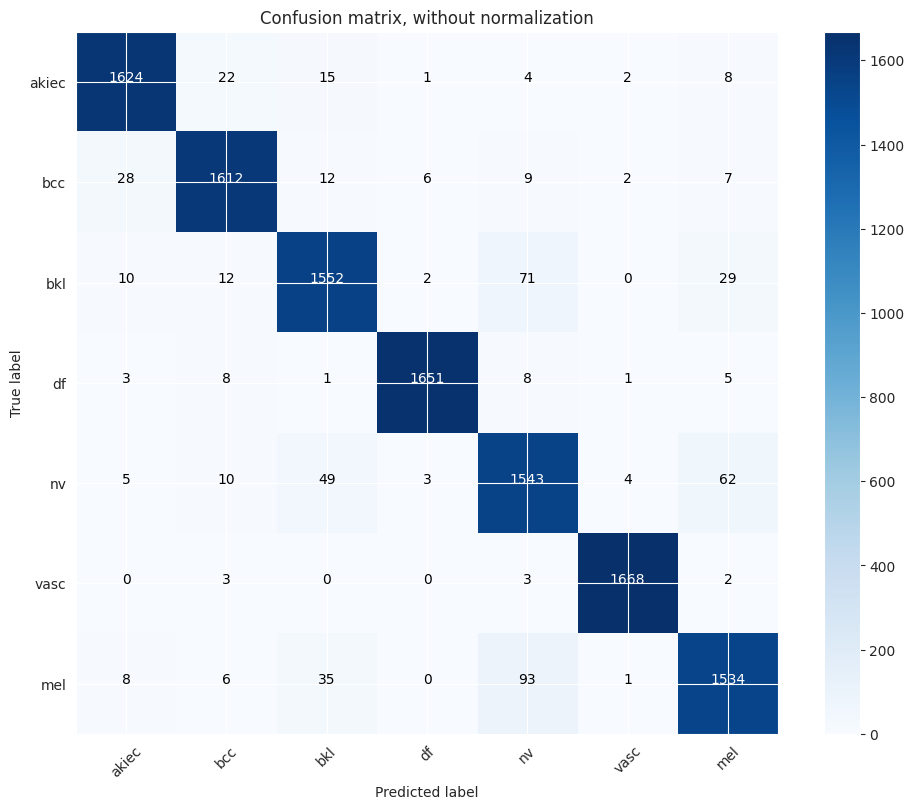

Kappa: 0.9453156267936464
MCC: 0.9453327766160763
Jaccard: 0.91233974730434
Testing Loss: 0.15094728767871857


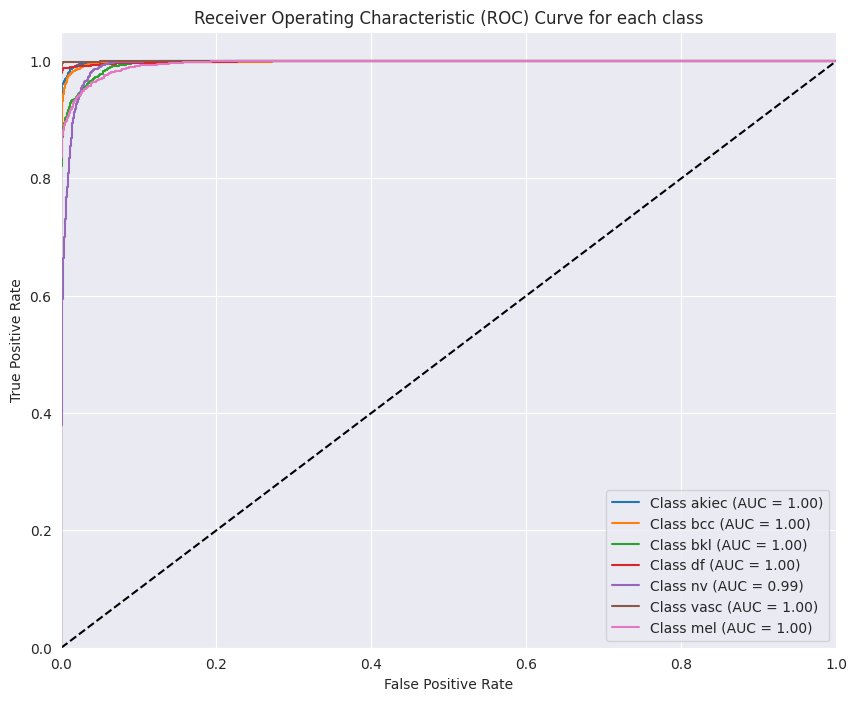

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef, jaccard_score
import itertools

# Assuming y_test, y_pred_proba_lr, and class_names are defined

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred_lr)
class_names = [classes[i][0] for i in sorted(classes)]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

# Calculate and print metrics
kappa = cohen_kappa_score(y_test_int, y_pred_lr)
mcc = matthews_corrcoef(y_test_int, y_pred_lr)
jaccard = jaccard_score(y_test_int, y_pred_lr, average='weighted')

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")
print(f"Testing Loss: {test_loss}") # Assuming test_loss is defined


# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train_features, y_train_int, X_test_features, y_test_int, and classes are defined from previous code

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(classes), random_state=42)

# Train the classifier
print("Training XGBoost classifier...")
xgb_classifier.fit(X_train_features, y_train_int)
print("XGBoost classifier trained successfully.")

# Make predictions
print("Making predictions with XGBoost classifier...")
y_pred_xgb = xgb_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_int, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb*100:.2f}%")

# Generate classification report
report_xgb = classification_report(
    y_test_int, y_pred_xgb,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("XGBoost Classification Report:\n", report_xgb)

Training XGBoost classifier...
XGBoost classifier trained successfully.
Making predictions with XGBoost classifier...
XGBoost Classifier Accuracy: 95.76%
XGBoost Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.98      0.97      0.98      1676
                            Basal cell carcinoma       0.97      0.97      0.97      1676
                   Benign keratosis-like lesions       0.93      0.93      0.93      1676
                                  Dermatofibroma       0.99      0.98      0.99      1677
                                Melanocytic nevi       0.89      0.93      0.91      1676
              Pyogenic granulomas and hemorrhage       1.00      1.00      1.00      1676
                                        Melanoma       0.95      0.91      0.93      1677

                                        accuracy                           0.96     11734
  

Confusion matrix, without normalization
[[1629   22   10    2    6    0    7]
 [  16 1625   16    1   12    2    4]
 [   7    6 1566    1   72    0   24]
 [   3    5    4 1650   11    1    3]
 [   4    6   49    4 1565    4   44]
 [   0    2    0    0    2 1669    3]
 [   4    6   33    2   99    1 1532]]


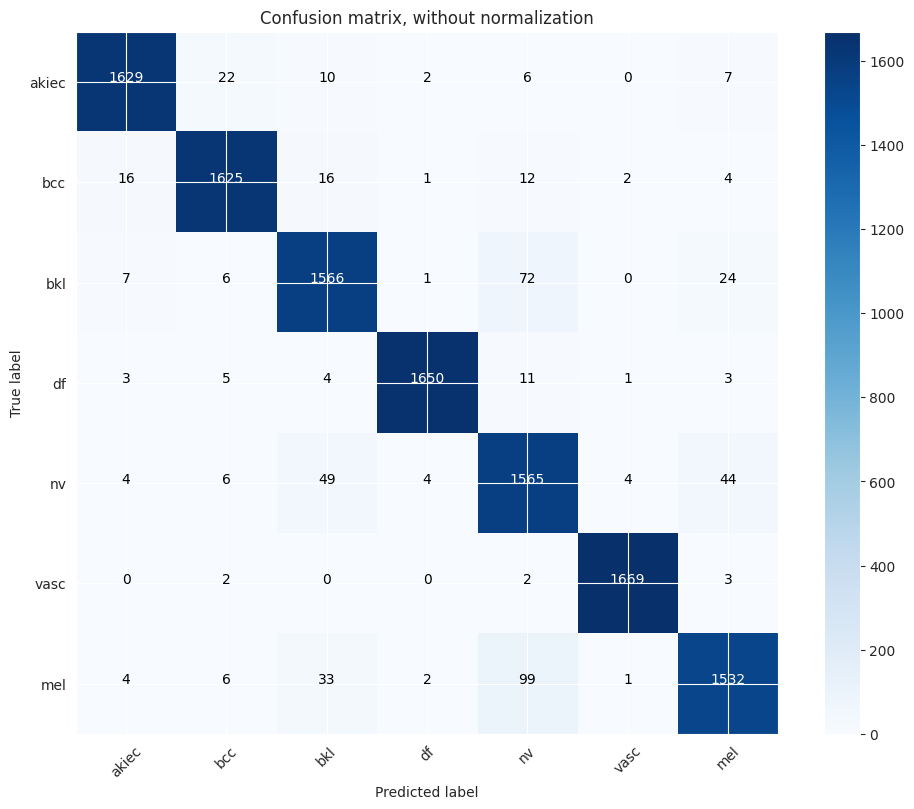

Kappa: 0.9504857995601408
MCC: 0.9505355758226992
Jaccard: 0.9205081308114254
Testing Loss: 0.15094728767871857


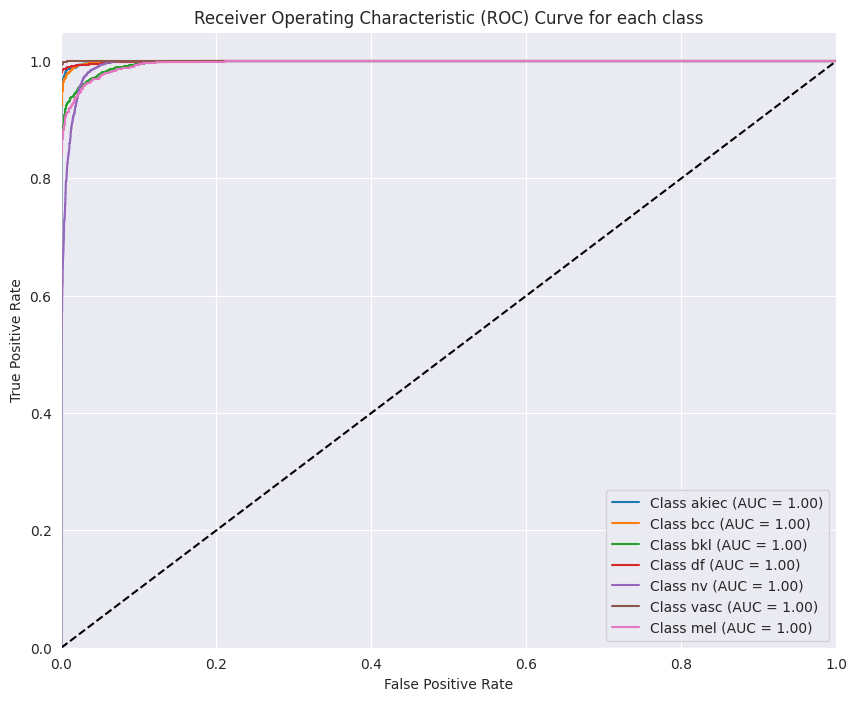

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, cohen_kappa_score, matthews_corrcoef, jaccard_score
import itertools
import numpy as np

# Assuming y_test_int and y_pred_xgb are defined from previous code

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred_xgb)
class_names = [classes[i][0] for i in sorted(classes)]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

# Calculate and print metrics
kappa = cohen_kappa_score(y_test_int, y_pred_xgb)
mcc = matthews_corrcoef(y_test_int, y_pred_xgb)
jaccard = jaccard_score(y_test_int, y_pred_xgb, average='weighted')

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")
print(f"Testing Loss: {test_loss}") # Assuming test_loss is defined


# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names)

# Use predict_proba for probabilities instead of predict
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_features)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

Training MLP classifier...
MLP classifier trained successfully.
Making predictions with MLP classifier...
MLP Classifier Accuracy: 95.59%
MLP Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.97      0.98      0.97      1676
                            Basal cell carcinoma       0.97      0.97      0.97      1676
                   Benign keratosis-like lesions       0.93      0.92      0.93      1676
                                  Dermatofibroma       0.99      0.99      0.99      1677
                                Melanocytic nevi       0.89      0.92      0.91      1676
              Pyogenic granulomas and hemorrhage       0.99      1.00      0.99      1676
                                        Melanoma       0.94      0.92      0.93      1677

                                        accuracy                           0.96     11734
                      

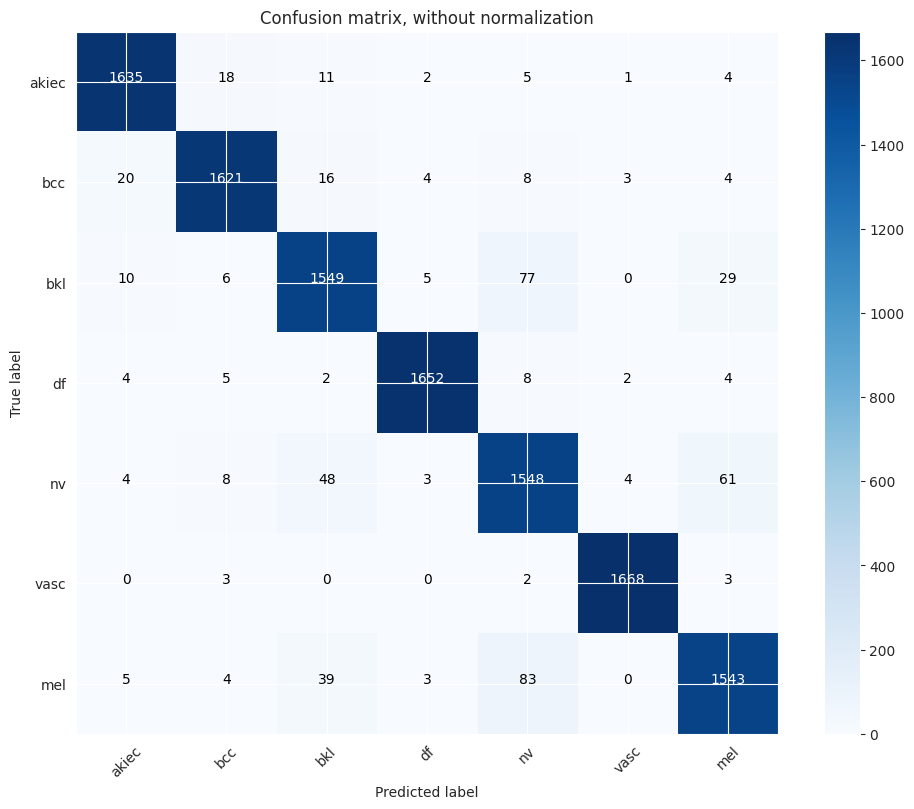

Kappa: 0.9484972599981248
MCC: 0.9485140576377423
Jaccard: 0.9172992396401664
Testing Loss: 0.15094728767871857


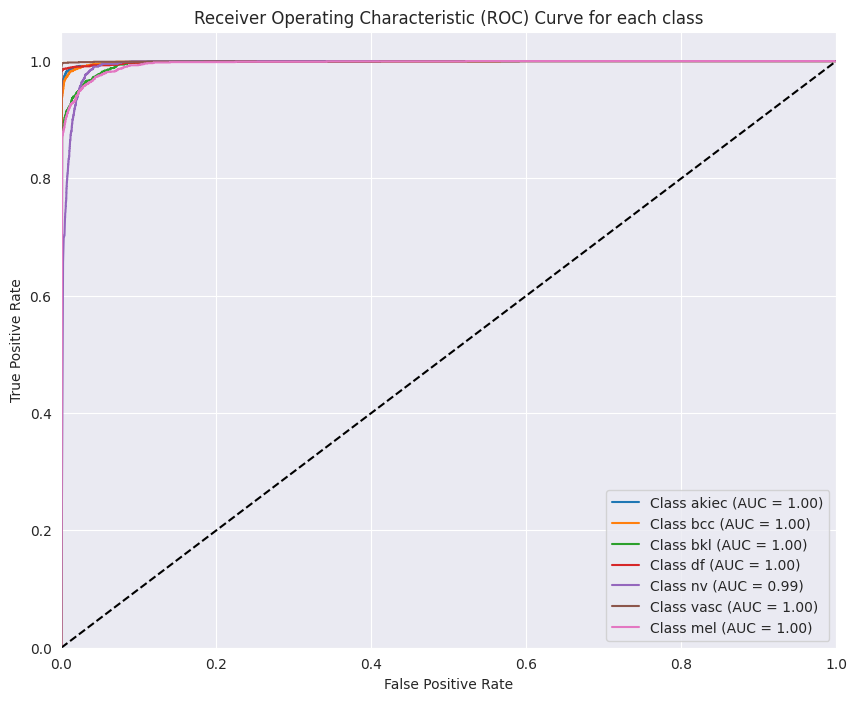

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score, matthews_corrcoef, jaccard_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Assuming X_train_features, y_train_int, X_test_features, y_test_int, and classes are defined from previous code

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)

# Train the classifier
print("Training MLP classifier...")
mlp_classifier.fit(X_train_features, y_train_int)
print("MLP classifier trained successfully.")

# Make predictions
print("Making predictions with MLP classifier...")
y_pred_mlp = mlp_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test_int, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp*100:.2f}%")

# Generate classification report
report_mlp = classification_report(
    y_test_int, y_pred_mlp,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("MLP Classification Report:\n", report_mlp)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test_int, y_pred_mlp)
class_names = [classes[i][0] for i in sorted(classes)]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.show()

# Calculate and print metrics
kappa = cohen_kappa_score(y_test_int, y_pred_mlp)
mcc = matthews_corrcoef(y_test_int, y_pred_mlp)
jaccard = jaccard_score(y_test_int, y_pred_mlp, average='weighted')

print(f"Kappa: {kappa}")
print(f"MCC: {mcc}")
print(f"Jaccard: {jaccard}")
print(f"Testing Loss: {test_loss}") # Assuming test_loss is defined


# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_names)

# Use predict_proba for probabilities instead of predict
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test_features)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install tf-keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
cbam_model_for_gradcam=load_model('/content/drive/MyDrive/Skin HAM10000/Latest/output/final_n_cbam.keras')


In [ ]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# Assuming 'cbam_model_for_gradcam' is your loaded model and 'X_test' contains your test images.
# Also assuming you have the necessary imports (tf, keras, etc.) from your code.

# Define the layer name
last_conv_layer_name = "conv2d_7"  # Replace with the actual name of your last convolutional layer


# Create a model that outputs the activation of the last convolutional layer.
last_conv_layer_model = Model(inputs=cbam_model_for_gradcam.input, outputs=cbam_model_for_gradcam.get_layer(last_conv_layer_name).output)


def get_image_prediction(image_id):
  img_path = "/content/drive/MyDrive/Skin HAM10000/HAM10000_images/"+ image_id + ".jpg"
  img = load_img(img_path, target_size=(28,28))
  img_array = img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)
  img_features = cbam_model_for_gradcam.predict(img_array_expanded)
  img_features_flat = img_features.reshape(img_features.shape[0], -1)
  predicted_output = rf_classifier.predict(img_features_flat)
  class_predicted = np.argmax(predicted_output, axis=1)[0]
  return img_array, class_predicted

def model_modifier(model):
  # Remove the softmax layer for GradCAM.
  # In this code, the original model has a softmax layer.
  # Removing it allows the GradCAM implementation to make more sense.
  model.layers[-1].activation = None
  return model

def score_function(output):
  # Define the loss function (in this case, the output score of the predicted class)
  return output[0][np.argmax(output[0])]


# Create Gradcam object
gradcam = Gradcam(cbam_model_for_gradcam, model_modifier, clone=False)


# The `score` argument is a function that takes a batch of images and returns a vector of the scores for each image.
# In this case, we're creating a function to select the class that the model predicts with the highest probability.
# We are using the predicted probabilities which are more informative than just the class prediction.





In [ ]:
import matplotlib.colors as mcolors
from PIL import Image

In [ ]:
def get_heatmap(dx, image_id):
    img_array, class_predicted = get_image_prediction(image_id)
    heatmap = gradcam(score_function,
                      X=np.expand_dims(img_array, axis=0),
                      penultimate_layer=-1) # Assuming the last layer is the penultimate layer for gradcam
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(np.uint8(img_array), 0.5, heatmap, 0.5, 0)
    plt.imshow(superimposed_img)
    plt.title(f"GradCAM for {image_id} - Predicted Class: {class_predicted}")
    plt.show()

In [ ]:
def get_heatmap(dx, image_id):
  img_array, class_predicted = get_image_prediction(image_id)
  class_abbr_predicted = classes[class_predicted][0]

  heatmap = gradcam(score_function,
                    img_array,
                    penultimate_layer=-1, # the last convolutional layer
                    )
  # Normalize and map the heatmap to RGB
  heatmap_normalized = np.uint8(255 * heatmap)

  # Apply a colormap (like jet) to the heatmap
  heatmap_colored = np.uint8(cm.jet(heatmap_normalized)[..., :3] * 255)

  # Remove the singleton dimensions (if your heatmap has extra dimensions)
  heatmap_colored = np.squeeze(heatmap_colored)

  # Ensure the heatmap is of the correct shape (height, width, channels)
  if heatmap_colored.ndim != 3:
    raise ValueError("Heatmap is not a 3D array of shape (height, width, channels)")

  # Convert the colored heatmap to an Image object
  heatmap_image = Image.fromarray(heatmap_colored)


  img_path = "/content/drive/MyDrive/Skin HAM10000/HAM10000_images/"+ image_id + ".jpg"
  img = load_img(img_path, target_size=(224,224))
  img_array = img_to_array(img)

  # Resize the heatmap to match the original image size
  heatmap_resized = heatmap_image.resize(img_array.shape[:2], Image.ANTIALIAS)

  # Convert the resized heatmap to a numpy array
  heatmap_resized = np.array(heatmap_resized)

  # Superimpose the heatmap onto the original image
  superimposed_img = heatmap_resized * 0.4 + img_array

  original_pil = Image.fromarray(img_array.astype('uint8'))
  superimposed_pil = Image.fromarray(superimposed_img.astype('uint8'))
  # Create a new figure for plotting
  plt.figure(figsize=(5, 5))




  # Plot the original image
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title(f'True class: {dx}', fontsize=12)
  plt.axis('off')

  # Plot the heatmap image
  plt.subplot(1, 2, 2)
  plt.imshow(superimposed_pil)
  plt.title(f'Predicted class: {class_abbr_predicted}', fontsize=12)
  plt.axis('off')

  # Adjust layout and display the plot
  plt.tight_layout()
  plt.show()
